In [303]:
###Steps which we will be following in this excercise are as follow -


## Step 1-   Reading and understanding the data.
## Step 2 -  Data Preperation
## Step 3 -  Data Visualization
## Step 4 - Splitting the data into train and test
## Step 5 - Model Building
## Step 6 - Final Verdict

## Importing all the required package and libraries

In [304]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Step 1- Reading and understanding the data

In [305]:
# Reading the input data
housing_data = pd.read_csv("D:/UG/Advanced_regression/train.csv", encoding = 'utf-8')

#### Analysing the file data and the fields available

In [306]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [307]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [308]:
housing_data.shape

(1460, 81)

In [309]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Checking for records with empty/null fields

In [310]:
#First thing is to check for the columns with high null values
#From above housing_data.info() command output we can clearly see few columns are having high null values like PoolQC-7, 
#MiscFeatures-281 and so on. We will programatically try to highlight and remove such columns where null value is higher
#than 80 to 85 percentage.

null_record_01 = round(housing_data.isnull().sum()/len(housing_data.index)*100,2)
null_record_02 = null_record_01[null_record_01 > 0]
null_record_02.sort_values(inplace=True, ascending = False)
null_record_02

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [311]:
#Hence proved our assumption was right that PoolQC, MiscFeatures, Alley and Fence are the onces with high null records
#So we will drop these columns before proceeding further.
#We will be dropping Id column as its kind of just and incremental/index column

housing_data = housing_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','Id'],1)

In [312]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [313]:
housing_data.shape

(1460, 76)

In [314]:
#Checking again for null values
null_record_01 = round(housing_data.isnull().sum()/len(housing_data.index)*100,2)
null_record_02 = null_record_01[null_record_01 > 0]
null_record_02.sort_values(inplace=True, ascending = False)
null_record_02

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

## Step 2 & 3  - Data Preperation & Data Visualization

#### Checking for any sort of correlation within the saleprice and other variables


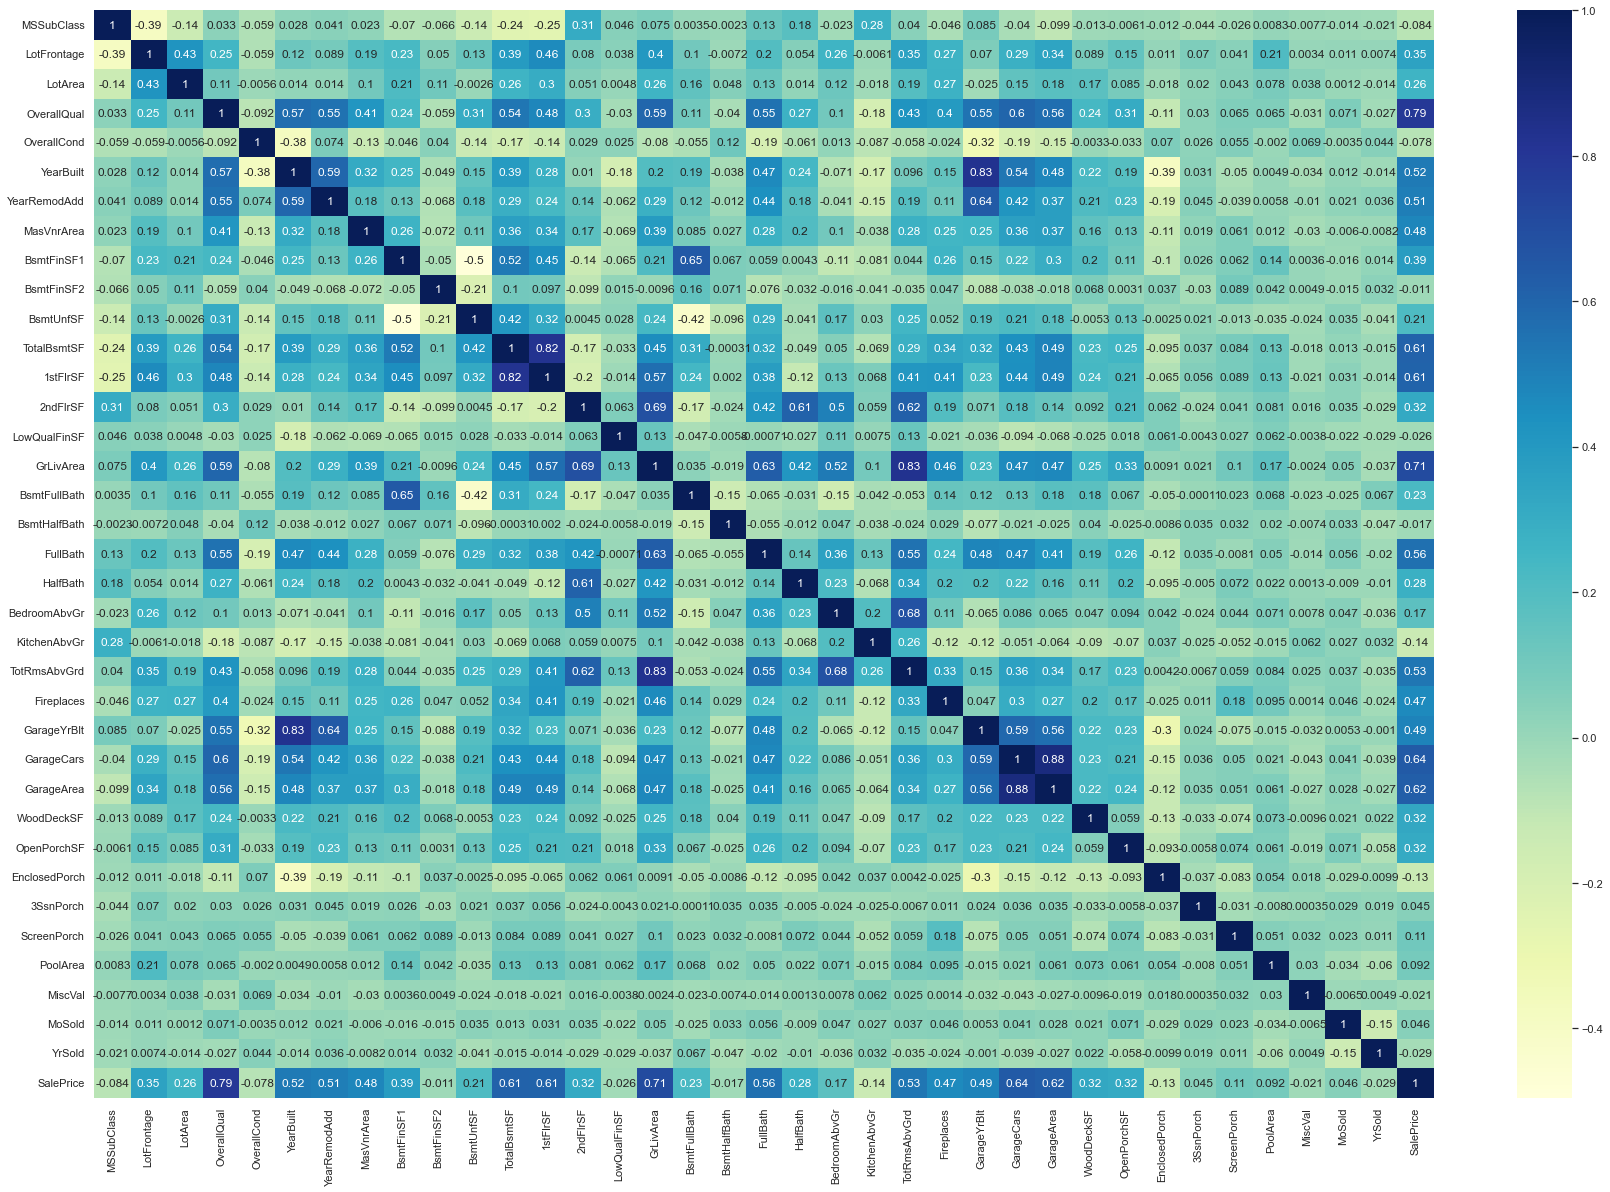

In [315]:
#Lets check for correlation matrix

plt.figure(figsize = (30,20))
sns.heatmap(housing_data.corr(), cmap="YlGnBu",annot=True)
plt.show()

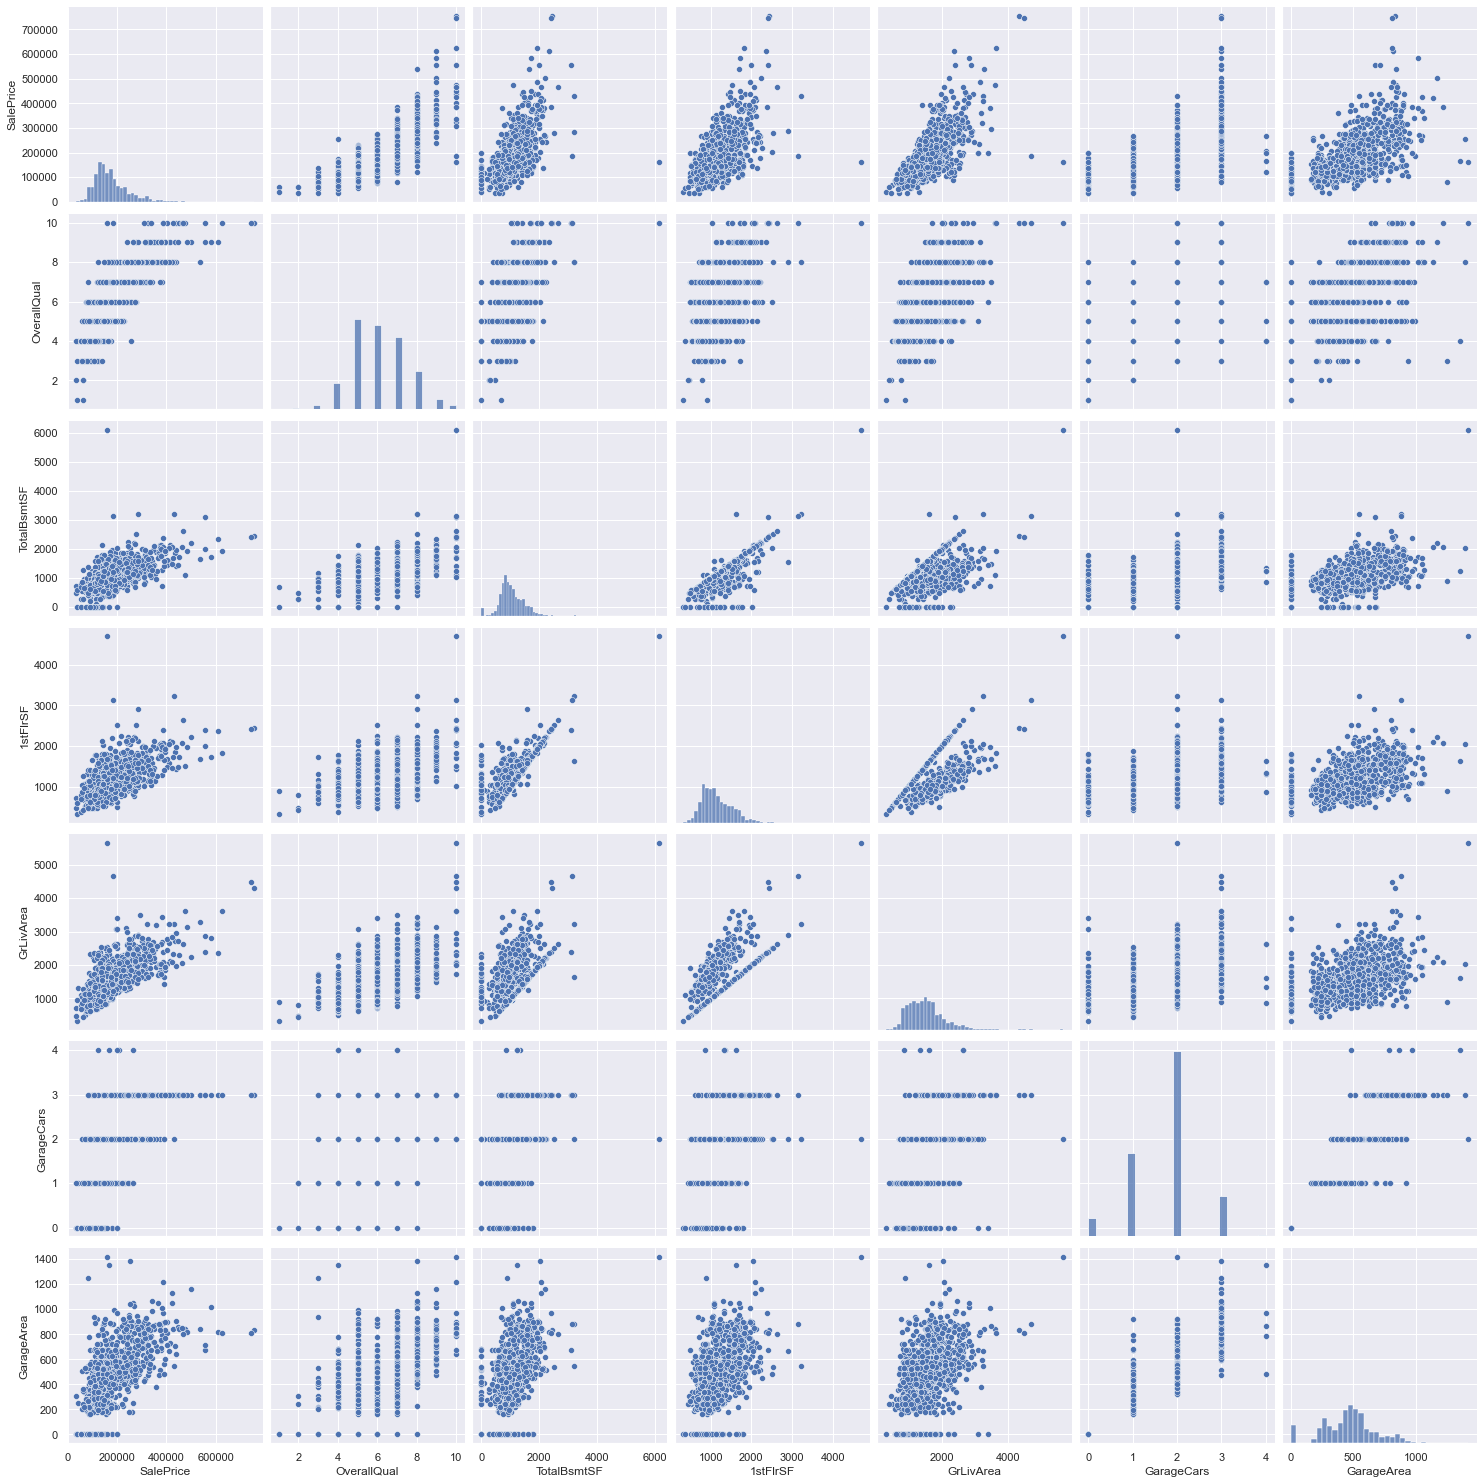

In [316]:


#Below is list of columns which has corr value greater than 0.60 and we will drop these
#OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
#Lets check for more details and correlation using pairplot
cols=['SalePrice','OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageCars','GarageArea']
sns.set()
sns.pairplot(housing_data[cols],size=3)
plt.show()

#### Dropping data fields which are having high corr value with SalePrice

In [317]:
housing_data = housing_data.drop(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageCars','GarageArea'],1)

In [318]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

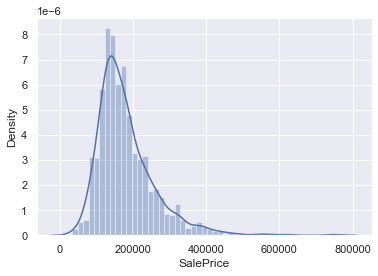

In [319]:
#Now lets check error term

sns.distplot(housing_data['SalePrice'])
#This looks bit more towards left side - left skewed hence we will do log transform

In [320]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [321]:
housing_data_copy = housing_data.copy

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

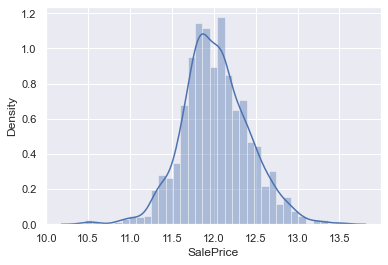

In [322]:
housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])
sns.distplot(housing_data['SalePrice'])

In [323]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [324]:
#Now lets workon the datatype and its dummy variables creation

data_type = housing_data.dtypes

#num data
num_data = data_type[(data_type == 'int64') | (data_type == float)]
#cat_data
housing_cat_data = housing_data.select_dtypes(include=['object'])
#Convert num_data to list
num_data_col = list(num_data.index) 



In [325]:
#print num_data_col and cat_data_col

print(num_data_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [326]:
housing_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [327]:
#Now lets convert cat_data_col into numerical and add dummy variable

housing_data_new = pd.get_dummies(housing_cat_data, drop_first=True)

housing_data_new.head()



,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [328]:
# Drop all categorical columns as we got dummies created for them
housing_data = housing_data.drop(list(housing_cat_data.columns),axis=1)



In [329]:
#Now we should join the housing_data with the new dummy data columns

housing_latest = pd.concat([housing_data, housing_data_new],axis=1)
housing_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(27), uint8(200)
memory usage: 638.9 KB


In [330]:
housing_latest.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [331]:
# Scaling the features

from sklearn.preprocessing import scale

cols = housing_latest.columns
housing_latest = pd.DataFrame(scale(housing_latest))
housing_latest.columns = cols
housing_latest.columns



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=231)

In [332]:
housing_latest.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_latest.fillna(999, inplace=True)

## Step 4 - Splitting the data into train and test

In [333]:
#Split data

X=housing_latest.drop(['SalePrice'], axis=1)

y = housing_latest['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5 - Model Building

# Check for RIDGE and LASSO 

In [334]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [335]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015627,0.009884,0.003125,0.006250,0.0001,{'alpha': 0.0001},-0.251889,-0.271202,-0.277214,-0.277628,...,-0.315618,0.092743,6,-0.162590,-0.167226,-0.165054,-0.168236,-0.163000,-0.165221,0.002236
1,0.016399,0.001547,0.006249,0.007654,0.0005,{'alpha': 0.0005},-0.251887,-0.271201,-0.277213,-0.277625,...,-0.307675,0.076959,5,-0.162590,-0.167226,-0.165054,-0.168236,-0.163075,-0.165236,0.002221
2,0.018750,0.011693,0.006249,0.007653,0.001,{'alpha': 0.001},-0.251884,-0.271201,-0.277213,-0.277621,...,-0.300848,0.063431,4,-0.162590,-0.167226,-0.165054,-0.168236,-0.163156,-0.165252,0.002205
3,0.015624,0.009882,0.003125,0.006250,0.005,{'alpha': 0.005},-0.251866,-0.271199,-0.277210,-0.277587,...,-0.281876,0.026530,2,-0.162589,-0.167226,-0.165053,-0.168236,-0.163498,-0.165320,0.002144
4,0.012500,0.006250,0.006250,0.007654,0.003,{'alpha': 0.003},-0.251875,-0.271200,-0.277212,-0.277604,...,-0.287471,0.037196,3,-0.162590,-0.167226,-0.165053,-0.168236,-0.163371,-0.165295,0.002166


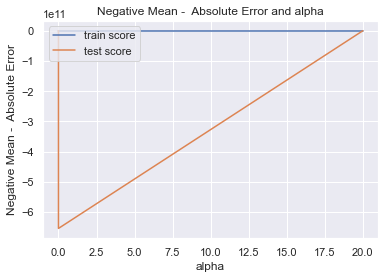

In [336]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean -  Absolute Error')
plt.title("Negative Mean -  Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [337]:
#Checking values for different values of alpha (10, 5, 1, 0.01, 0.03, 0.05)
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9388754520961385

In [338]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9513073702871672

In [339]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9424652751731408

In [340]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9533206363544553

In [341]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.944886557674731

In [342]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9563908879767801

In [343]:
#Using ridge regression with multiple values of alpha we are still getting good result of .093 and above


In [344]:
#Now lets run model using LASSO regression model
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [345]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.247770,0.051243,0.006251,0.007655,0.0001,{'alpha': 0.0001},-0.249589,-0.269718,-0.274302,-0.273928,...,-0.265629,0.009416,5,-0.162812,-0.167336,-0.165093,-0.168245,-0.164036,-0.165504,0.002022
1,0.212491,0.064496,0.003125,0.006250,0.0005,{'alpha': 0.0005},-0.242973,-0.266742,-0.270458,-0.268016,...,-0.260311,0.010513,4,-0.163973,-0.168162,-0.165984,-0.169743,-0.165710,-0.166714,0.002016
2,0.237493,0.097024,0.003124,0.006249,0.001,{'alpha': 0.001},-0.237342,-0.262893,-0.268978,-0.261751,...,-0.255996,0.011366,3,-0.165567,-0.169157,-0.167568,-0.171788,-0.167731,-0.168362,0.002060
3,0.128121,0.047801,0.009374,0.007654,0.005,{'alpha': 0.005},-0.230654,-0.256247,-0.278001,-0.247113,...,-0.251791,0.015486,2,-0.191449,-0.185364,-0.186894,-0.194415,-0.191165,-0.189857,0.003286
4,0.274993,0.099608,0.015623,0.000003,0.003,{'alpha': 0.003},-0.227486,-0.255193,-0.272406,-0.249126,...,-0.250091,0.014496,1,-0.176154,-0.176137,-0.177415,-0.183193,-0.178122,-0.178204,0.002607


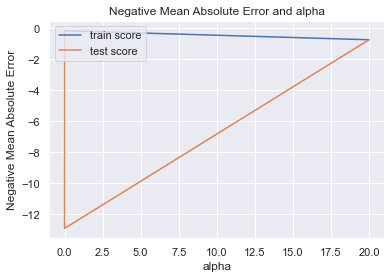

In [346]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [347]:
#Checking values for different values of alpha (10, 5, 1, 0.01, 0.03, 0.05)
alpha = 5
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.08894823147900144

In [348]:
alpha = 5
lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.14714827023820487

In [349]:
alpha =10
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.0870688342669722

In [350]:
alpha = 5
lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.14714827023820487

## Step 6 - Final Verdict

### Using Ridge and Lasso regression based on the R2 square value we can say ridge model worked well on both test and train data 
### and the resulted r2 score was almost same for test and train and was good more than 0.93 but in lasso regression
### the value of test and train data was less then Ridge hence we would consider ridge regression for our model prediction